<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="house.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                  <b> 
                   </b>Bangalore House Price Prediction
                </font>
            </div>
        </td>
    </tr>
</table>

## Description
What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

## Problem Statement
### By analyzing these Bangalore house data we will determine the approximate price for the houses

## Data Description
📌 Area_type - Description of the area

📌 Availability - When it can be possessed or when it is ready

📌 Location - Where it is located in Bengaluru

📌 Size - BHK or Bedrooms

📌 Society - To which society it belongs

📌 Total_sqft - Size of the property in sq.ft

📌 Bath - No. of Bathrooms

📌 Balcony - No. of the Balcony

📌 Price - Value of the property in lakhs (Indian Rupee - ₹)

## Business objective and Constraints

1. From this project we will able to understand how house prices depend on other factors.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
df=pd.read_csv("C:/Users/Dhanush gowda/Desktop/Capstone project/ML Bangalore house prediction/bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Exploratory Data Analysis(EDA)
 EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

### Checking the shape of the Dataset

In [3]:
df.shape

(13320, 9)

### How many columns are present in the Dataset?

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

## Information about the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#### See here you can see the bath column has some outliers

### Checking for missing values

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Here you observe that society and balcony column as lot of missing values(null)


### Checking the value counts of categorical column

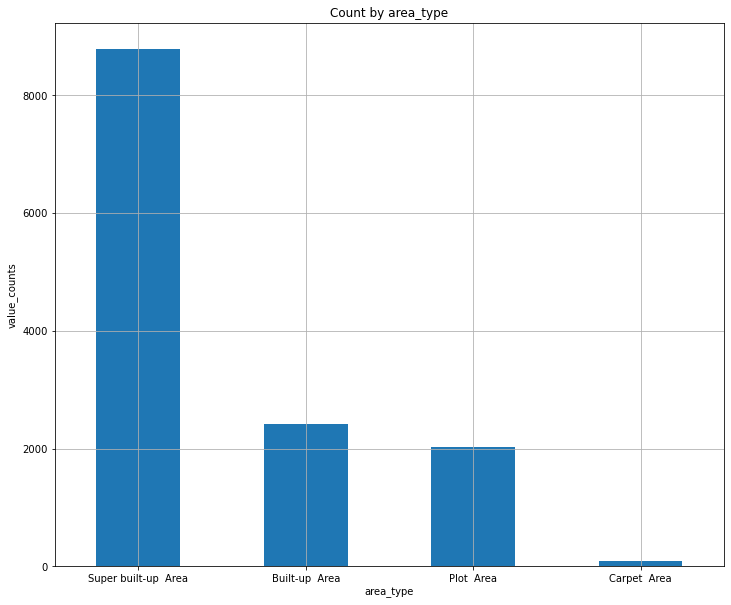

In [7]:
### checking value counts in the 'area_type'
df.area_type.value_counts().plot.bar(figsize=(12,10),title='Count by area_type')
plt.xlabel('area_type')
plt.ylabel('value_counts')
plt.xticks(rotation=0)
plt.grid()

#### From this Graph we can observe that Area type is mostly of Super built up Area

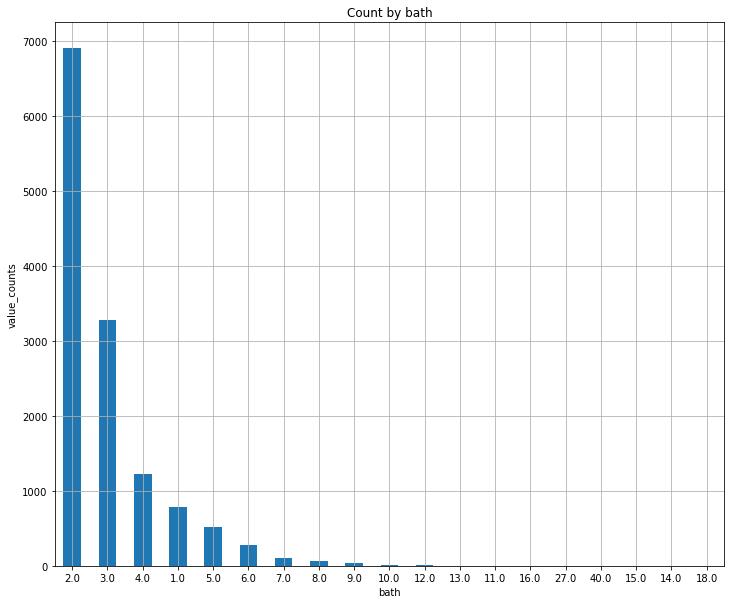

In [8]:
### checking value counts in the 'bath'
df.bath.value_counts().plot.bar(figsize=(12,10),title='Count by bath')
plt.xlabel('bath')
plt.ylabel('value_counts')
plt.xticks(rotation=0)
plt.grid()

#### From this Graph we can see that most of houses have 2-3 bathrooms.

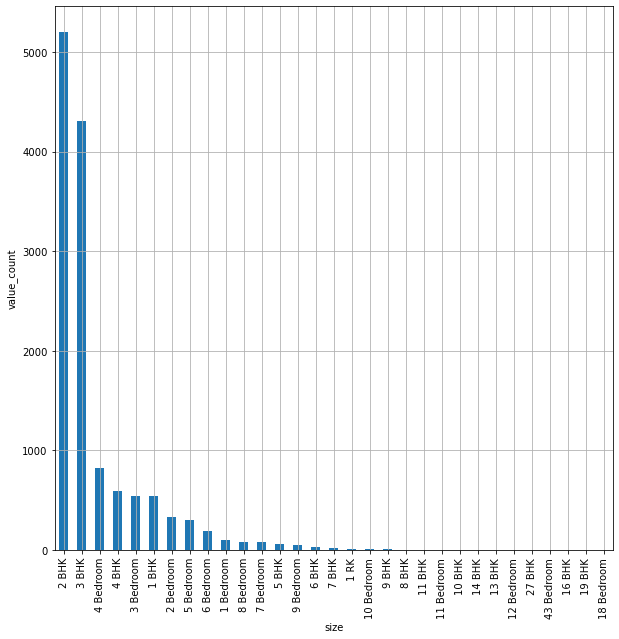

In [9]:
## checking the value counts of 'size'
plt.figure(figsize = (10,10))
df['size'].value_counts().plot(kind='bar')
plt.xlabel('size')
plt.ylabel('value_count')
plt.grid()

#### From that above Graph we can observe that most of the houses have 2BHK/3BHK

### Converting total_sqrt column as float 

In [10]:
df['total_sqft'].isnull().sum()

0

In [11]:
df['total_sqft'].tail(30)

13290           4050
13291            812
13292           1440
13293           2425
13294           2200
13295           1810
13296           1200
13297           1060
13298           1015
13299    2830 - 2882
13300           1500
13301           1454
13302           1075
13303            774
13304           1187
13305            500
13306           1200
13307           1805
13308           1527
13309           1675
13310           1050
13311           1500
13312           1262
13313           1345
13314           1715
13315           3453
13316           3600
13317           1141
13318           4689
13319            550
Name: total_sqft, dtype: object

#### From the above we can see that total_sqft can be a range (say, 2830-2882). For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. 

In [12]:
# Getting the data that are float only


def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
bool_ts=df["total_sqft"].apply(is_float)
bool_ts

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13320, dtype: bool

#### To extract data which are not float from the given column "total_sqft"

In [14]:
# selecting the Non-Float data 

df[bool_ts==False].head(30)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770


In [15]:
# converting the Non-Float range data to Float type

def range_to_sqft(x):
    new=x.split('-')
    if len(new)==2:
        return(float(new[0])+float(new[-1])/2)
    try:
        return float(x)
    except:
        return x

In [16]:
# applying the function to  column name 'total_sqft'

df['total_sqft']=df['total_sqft'].apply(range_to_sqft)

In [17]:
# Again checking for float

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
# checking if float then true else False

bool_ts=df["total_sqft"].apply(is_float)
bool_ts

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13320, dtype: bool

In [19]:
# Selecting only the non float

bool_new=df[bool_ts==False]
bool_new

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.50
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,NaN,4125Perch,9.0,NaN,265.00
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,NaN,1000Sq. Meter,2.0,1.0,93.00
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,NaN,1100Sq. Yards,2.0,NaN,45.00
1019,Plot Area,18-Mar,Marathi Layout,1 Bedroom,NaN,5.31Acres,1.0,0.0,110.00
1086,Plot Area,19-Mar,Narasapura,2 Bedroom,NaN,30Acres,2.0,2.0,29.50
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,NaN,716Sq. Meter,9.0,1.0,296.00
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,CoiewSy,1500Sq. Meter,3.0,1.0,95.00
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,Sosisic,142.61Sq. Meter,3.0,1.0,115.00
1821,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Inensba,1574Sq. Yards,3.0,1.0,76.00


In [20]:
# user define function to convert all the measurements to square feets

def str_num(x):
    for i in df['total_sqft']:
        num=str(x)
        if num.endswith('Sq. Meter'):
            return float(i)*10.764
        elif num.endswith('Sq. Yards'):
            return float(i)*9
        elif num.endswith('Cents'):
            return float(i)*435.56
        elif num.endswith('Acres'):
            return float(i)*43560
        elif num.endswith('Perch'):
            return float(i)*272.25
        elif num.endswith('Guntha'):
            return float(i)*1089
        elif num.endswith('Grounds'):
            return float(i)*2400
        else:
            return x   

In [21]:
# applying the function to the 'total_sqft' column 

df['total_sqft'] = df['total_sqft'].apply(lambda x: str_num(x))

df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [22]:
 #converting the datatype of 'total_sqft' from object to float

df['total_sqft']=df['total_sqft'].astype('float64')

In [23]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

#### We Converted the total_sqrt column from object to float

In [24]:
# 'Society' column can be dropped since it will not put a big impact on the house price since its Secondary to look at.

df.drop('society',axis=1,inplace=True)

### Pictorial representation of missing values

<AxesSubplot:>

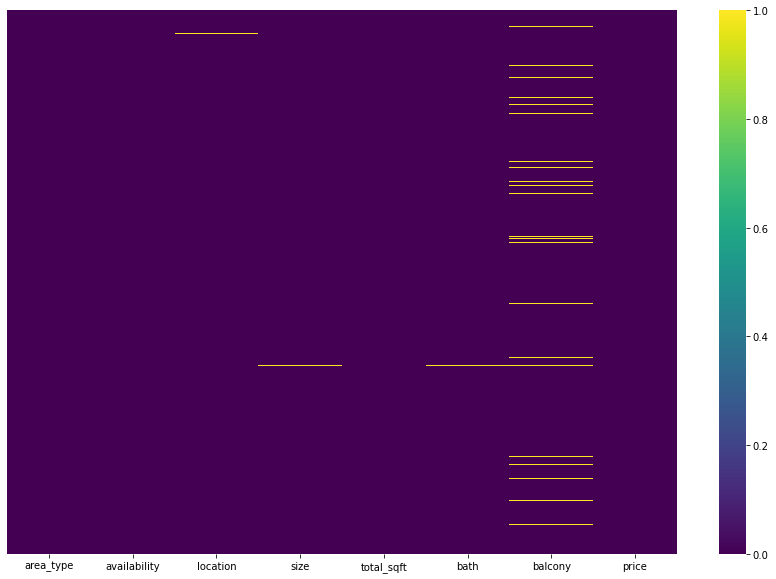

In [25]:
## check the null values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),yticklabels=False,cmap='viridis')

## Treating null values in 'size

In [26]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### Here we can observe that  2 BHK and  2 bedroom means the same both as same meaning so we are converting them into one format i.e BHK

In [27]:
# converting all alphabets in string to 'BHK'
def bhk(x):
    i=str(x)
    if i.endswith('Bedroom'):
        return i.replace('Bedroom','BHK')
    elif i.endswith('RK'):
        return i.replace('RK','BHK')
    else:
        return x

In [28]:
df['size']=df['size'].apply(lambda x:bhk(x))

In [29]:
# Replacing all the 'nan' with '0'
df['size'].replace(to_replace = np.nan, value =0,inplace=True)

In [30]:
# replacing all the '0' with '0 BHK'
df['size'].replace(to_replace = 0, value ="0 BHK",inplace=True)

In [31]:
df['size'].isnull().sum()

0

In [32]:
df['size'][0].split(" ")[0]

'2'

## Creating a Copy as 'df_new'

In [33]:
# copy 
df_new=df.copy(deep=True)

#### Now we will convert the old column 'size' to new numerical column 'BHK' and will Drop the old Size column

In [34]:
# converting the old column 'size' to new numerical column 'BHK'
df_new['BHK']=df_new['size'].str.split().apply(lambda x: x[0])

In [35]:
# Dropping the column 'size' since not required anymore
df_new.drop('size',axis=1,inplace=True)

In [36]:
df_new

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


## Treating null value in 'location'

In [37]:
df_new[df_new.location.isnull()]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
568,Super built-up Area,Ready To Move,NaN,1600.0,3.0,2.0,86.0,3


In [38]:
df_new['location'].mode()

0    Whitefield
Name: location, dtype: object

In [39]:
df_new['location'].fillna('Whitefield',inplace=True)

In [40]:
df_new.location.isnull().sum()

0

In [41]:
df_new.location.value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [42]:
df_new['location'] = df_new['location'].apply(lambda x: x.strip())   
df_new['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [43]:
location_count=df_new.location.value_counts()
location_count

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

#### Here we can observe that location has lot of unique locations. so we are converting the locations which are having location_count less than 30 into new category as 'Other' for better understanding of data

In [44]:
location_count_30 = location_count[location_count < 30]
location_count_30

Dodda Nekkundi                    29
Kudlu                             29
Kammasandra                       29
BTM 2nd Stage                     29
Horamavu Banaswadi                28
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1194, dtype: int64

In [45]:
df_new['location'] = df_new['location'].apply(lambda x: 'other' if x in location_count_30 else x)

In [46]:
df_new['location'].value_counts()

other                 5379
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Mahadevpura             31
Kumaraswami Layout      30
Doddathoguru            30
Chikkalasandra          30
Ananth Nagar            30
Name: location, Length: 101, dtype: int64

## Treating Null Values in 'balcony'

In [47]:
df_bal=df_new.pivot_table(values='balcony',index='area_type',aggfunc=np.median)
df_bal

,balcony
area_type,
Built-up Area,1.0
Carpet Area,1.0
Plot Area,1.0
Super built-up Area,2.0


In [48]:
bool_bal=df_new.balcony.isnull()
bool_bal

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316     True
13317    False
13318    False
13319    False
Name: balcony, Length: 13320, dtype: bool

In [49]:
df_new.loc[bool_bal,'balcony']=df_new.loc[bool_bal,'area_type'].apply(lambda x: df_bal.loc[x])

In [50]:
df_new.balcony.isnull().sum()

0

## Treating Null values in "bath"

In [51]:
df_bath=df_new.pivot_table(values='bath',index='area_type',aggfunc=np.median)
df_bath

,bath
area_type,
Built-up Area,2.0
Carpet Area,2.0
Plot Area,4.0
Super built-up Area,2.0


In [52]:
bool_bath=df_new.bath.isnull()
bool_bath

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Name: bath, Length: 13320, dtype: bool

In [53]:
df_new.loc[bool_bath,'bath']=df_new.loc[bool_bath,'area_type'].apply(lambda x: df_bath.loc[x])

In [54]:
df_new.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
BHK             0
dtype: int64

#### We treated the missing values

### Converting all the dates to 'Will Be Available' in 'availability' column

In [55]:
df_new.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

### Here we coverting the Dates into 'Will be availabel' and 'Immediate Possession' into 'Ready To Move'

In [56]:
df_new['availability']=df_new['availability'].replace('Immediate Possession','Ready To Move')

In [57]:
df_new.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [58]:
def changeitem(x):
    if x!='Ready To Move':
        x='will be available'
        return x
    else:
        return 'Ready To Move'

In [59]:
df_new['availability']=df_new['availability'].apply(lambda x: changeitem(x))

In [60]:
df_new['availability'].unique()

array(['will be available', 'Ready To Move'], dtype=object)

In [61]:
# Replacing the unique values to 0 and 1 in 'availability' columns

df_new['availability']=df_new['availability'].replace(['will be available', 'Ready To Move'],[0,1])

In [62]:
df_new

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,1,other,2600.0,5.0,3.0,120.00,4
2,Built-up Area,1,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,1,other,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,1,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,1,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,1,other,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,1,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,0,other,4689.0,4.0,1.0,488.00,4


## Summary Statistics

In [63]:
df_new.describe()

,availability,total_sqft,bath,balcony,price
count,13320.000000,1.332000e+04,13320.000000,13320.000000,13320.000000
mean,0.795571,2.967284e+04,2.691216,1.580781,112.565627
std,0.403299,1.127286e+06,1.339310,0.805654,148.971674
min,0.000000,1.000000e+00,1.000000,0.000000,8.000000
25%,1.000000,1.100000e+03,2.000000,1.000000,50.000000
50%,1.000000,1.280000e+03,2.000000,2.000000,72.000000
75%,1.000000,1.693000e+03,3.000000,2.000000,120.000000
max,1.000000,4.599936e+07,40.000000,3.000000,3600.000000


In [64]:
df_new.dtypes

area_type        object
availability      int64
location         object
total_sqft      float64
bath            float64
balcony         float64
price           float64
BHK              object
dtype: object

### Converting 'BHK' from object type to numeric using astype

In [65]:
df_new['BHK']=df_new['BHK'].astype('float64')

In [66]:
df_new.dtypes

area_type        object
availability      int64
location         object
total_sqft      float64
bath            float64
balcony         float64
price           float64
BHK             float64
dtype: object

## Outlier Detection and Treatment

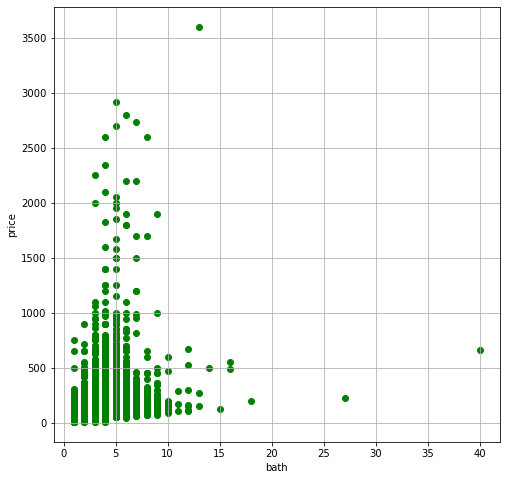

In [67]:
## To check the outliers in 'price' with respect to 'bath'
plt.figure(figsize=(8,8))
plt.scatter(x='bath',y='price',data=df_new,color="green")
plt.xlabel('bath')
plt.ylabel('price')
plt.grid()
plt.show()

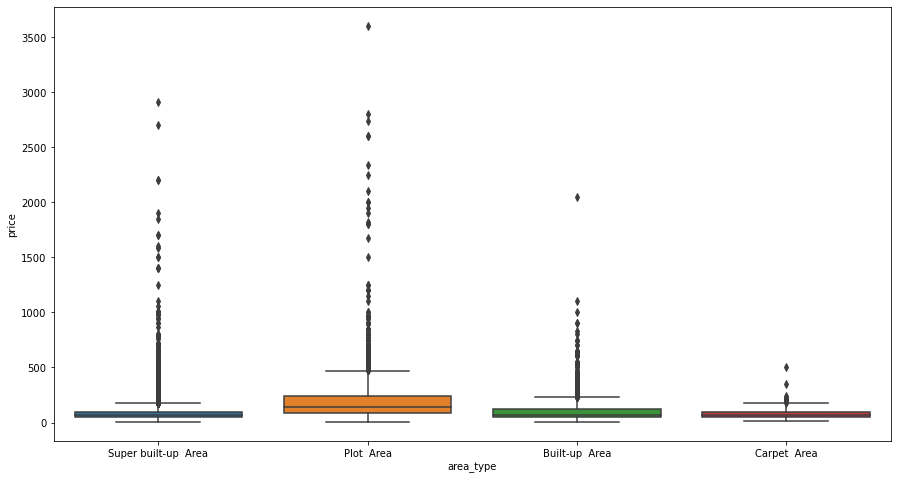

In [68]:
## To check the outliers in 'price' with respect to 'area_type'
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='area_type',y='price')
plt.xlabel('area_type')
plt.ylabel('price')
plt.show()

### Creating a new column 'Per_sqft_price' for better understanding of data .

In [69]:
df_new['Per_sqft_price']=round((df_new['price']/df_new['total_sqft'])*100000,2)

### Finding Outliers using Standard Deviation and mean

In [70]:
def rmv_outlierBy_std(x):
    out_df = pd.DataFrame()
    for key, subdf in x.groupby('location'):
        mean = np.mean(subdf.Per_sqft_price)
        std = np.std(subdf.Per_sqft_price)
        reduced_df = subdf[(subdf.Per_sqft_price > (mean - std)) & (subdf.Per_sqft_price < (mean + std))]
        out_df = pd.concat([out_df, reduced_df], ignore_index = True)
    return out_df

df1 = rmv_outlierBy_std(df_new)

### Now we can remove those 2 BHK apartments whose Per_sqft_price is less than mean Per_sqft_price of 1 BHK apartment

In [71]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Per_sqft_price),
                'std': np.std(bhk_df.Per_sqft_price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_sqft_price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df2 = remove_bhk_outliers(df1)

In [72]:
df2

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,Per_sqft_price
0,Super built-up Area,1,5th Phase JP Nagar,1075.0,2.0,2.0,60.0,2.0,5581.40
1,Built-up Area,1,5th Phase JP Nagar,1150.0,3.0,3.0,52.5,2.0,4565.22
2,Super built-up Area,0,5th Phase JP Nagar,1070.0,2.0,2.0,39.0,2.0,3644.86
3,Built-up Area,1,5th Phase JP Nagar,1256.0,2.0,1.0,62.8,2.0,5000.00
4,Super built-up Area,1,5th Phase JP Nagar,1207.0,2.0,2.0,63.0,2.0,5219.55
...,...,...,...,...,...,...,...,...,...
12074,Super built-up Area,1,other,1200.0,2.0,2.0,140.0,2.0,11666.67
12077,Plot Area,1,other,1200.0,5.0,1.0,325.0,4.0,27083.33
12078,Built-up Area,1,other,1805.0,3.0,3.0,134.0,3.0,7423.82
12079,Super built-up Area,1,other,3600.0,5.0,2.0,400.0,4.0,11111.11


## Distribution of Variables

###  Distribution of numeric variables

#### We plot the histogram to check the distribution of the variables.

In [73]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number is used to select the numeric features
df_numeric_features = df2.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['availability', 'total_sqft', 'bath', 'balcony', 'price', 'BHK',
       'Per_sqft_price'],
      dtype='object')

In [74]:
plt.rcParams["figure.figsize"] = [20,15]

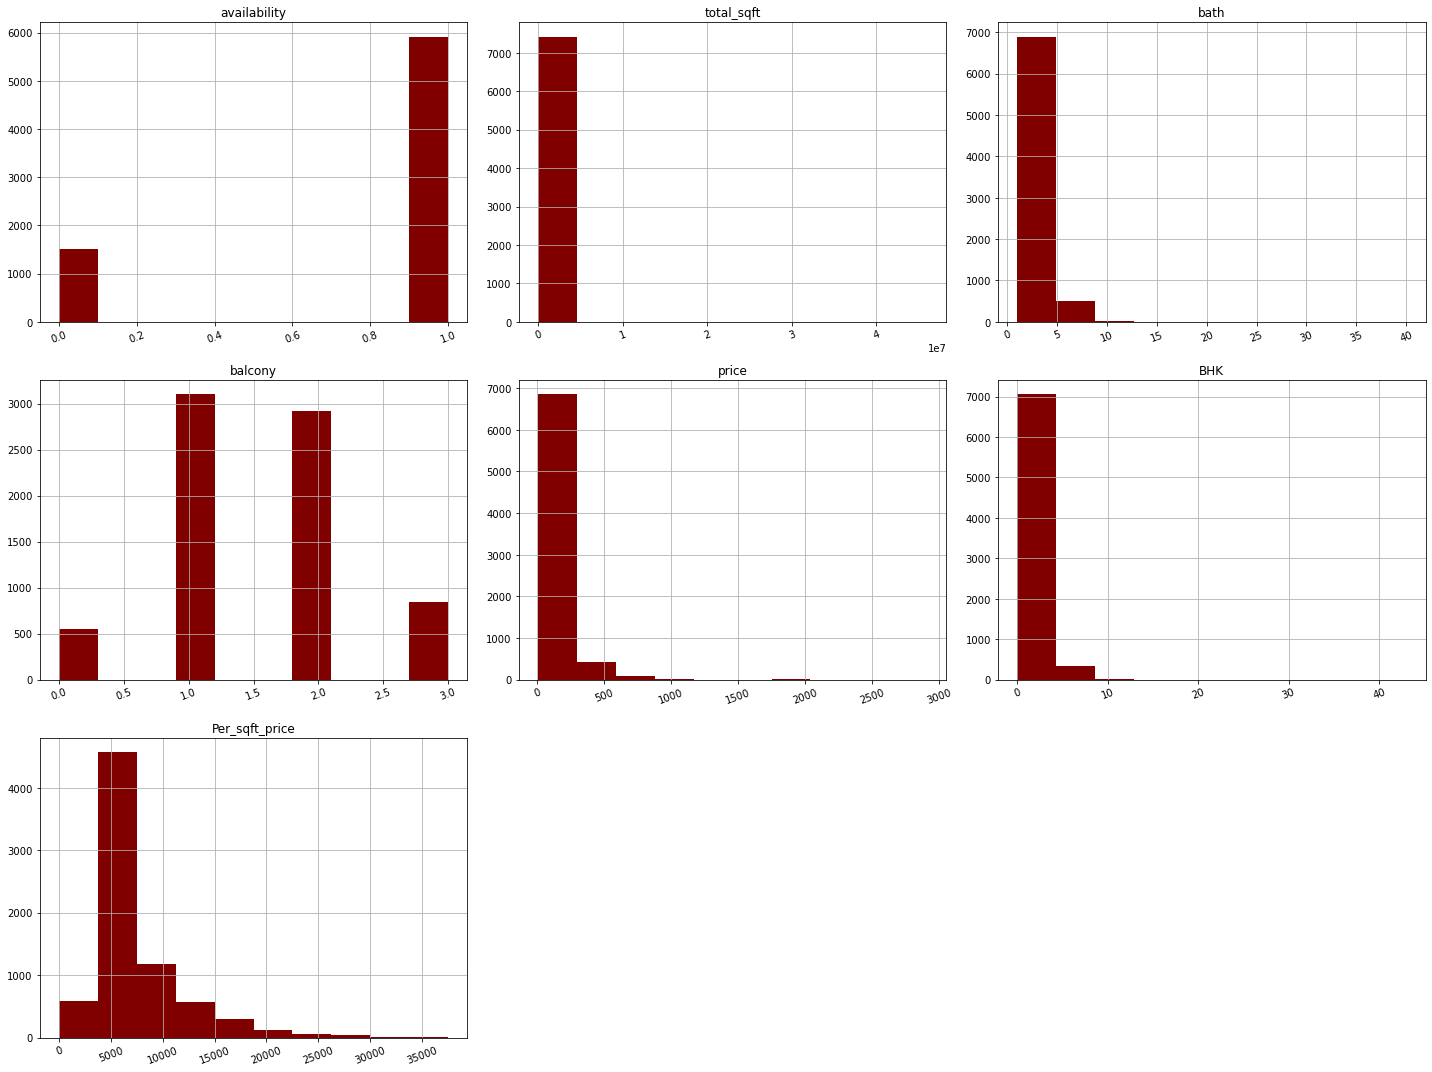

In [75]:
# plot the histogram of numeric variables
# hist() by default considers the numeric variables only, 
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'

df_numeric_features.hist(xrot = 20, color = "maroon")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

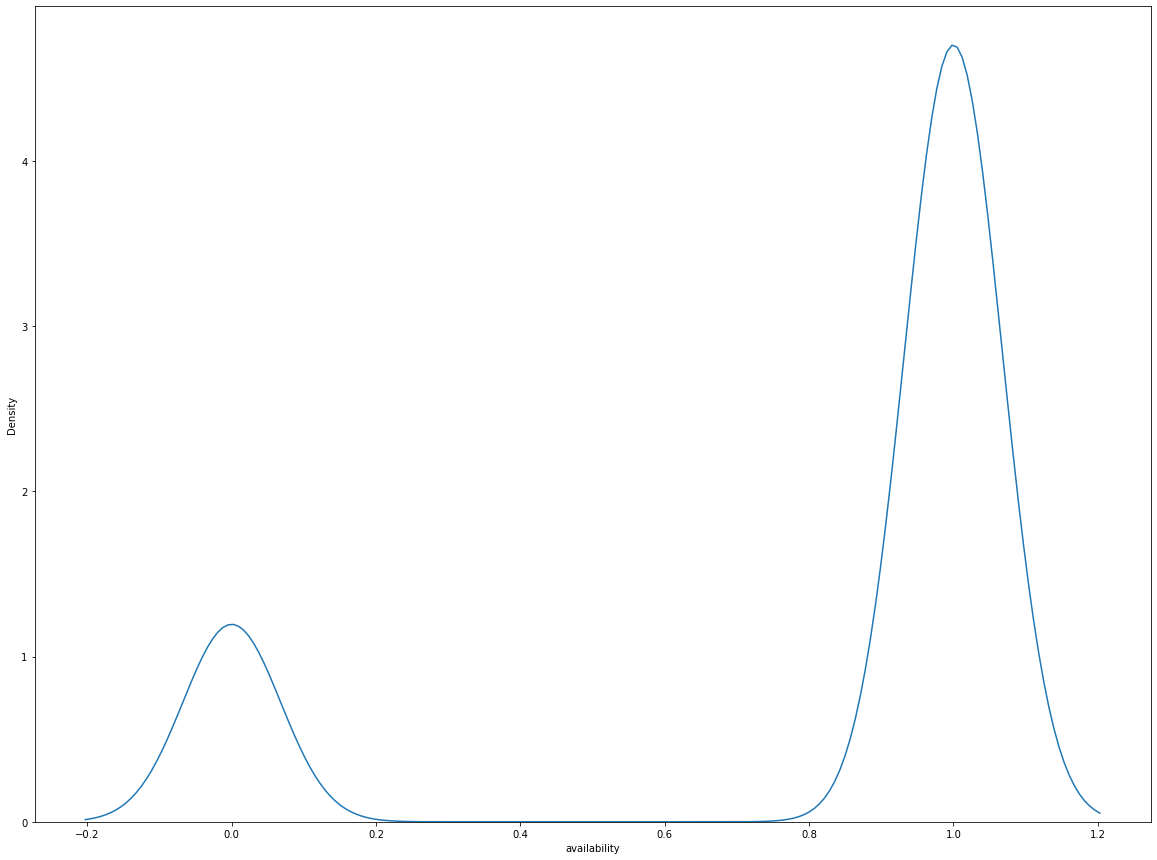

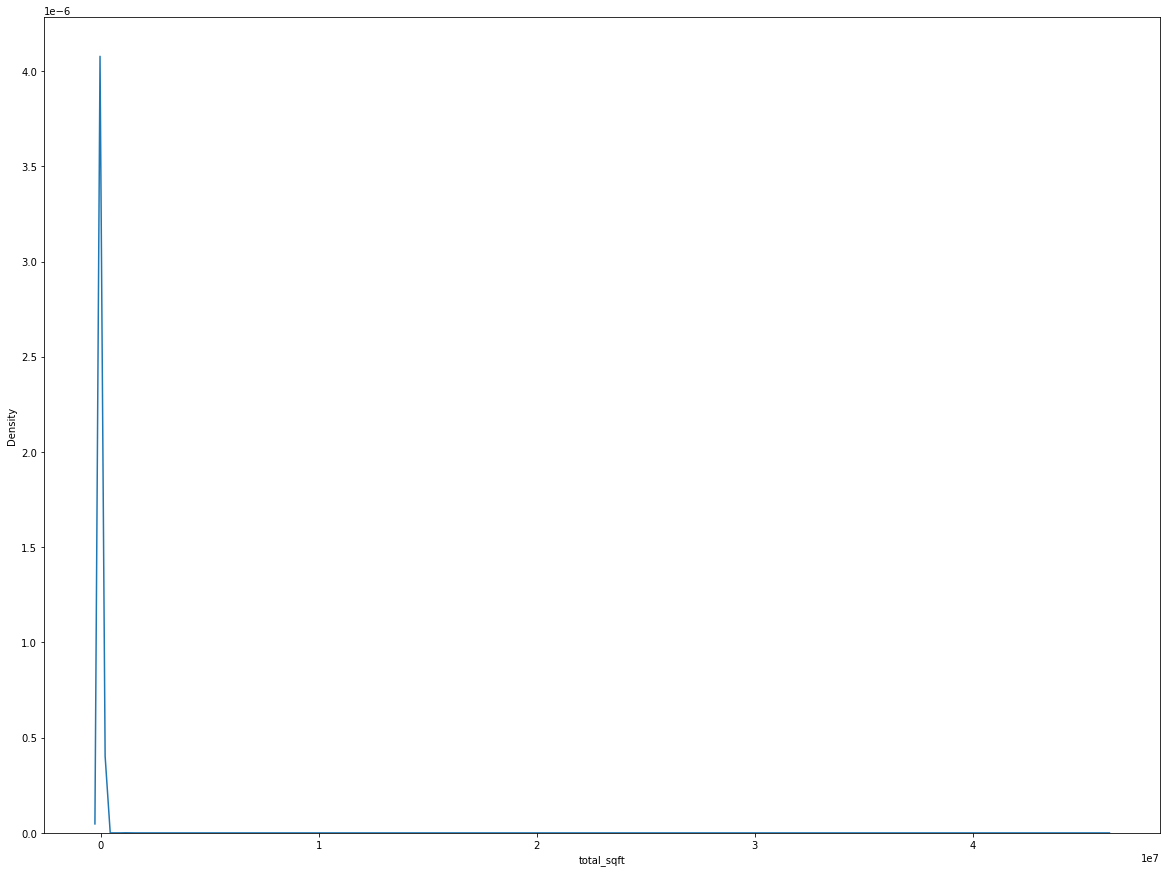

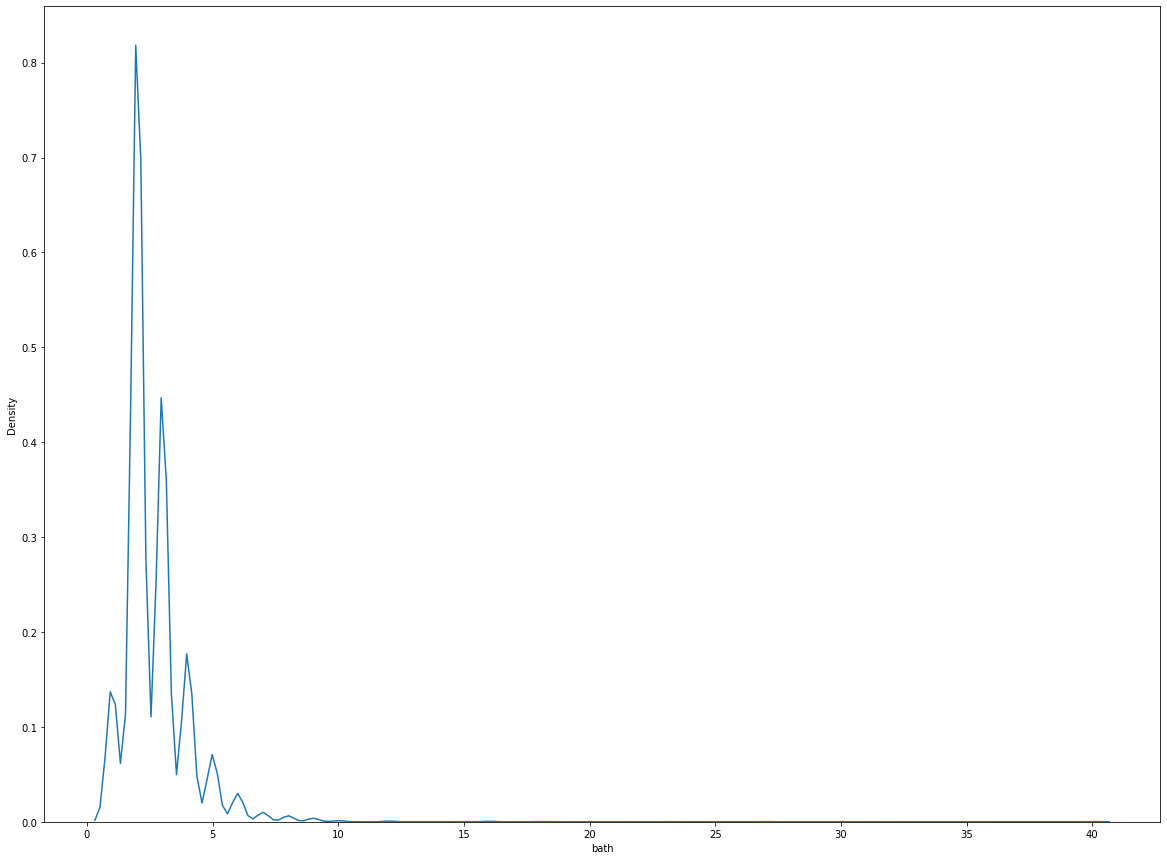

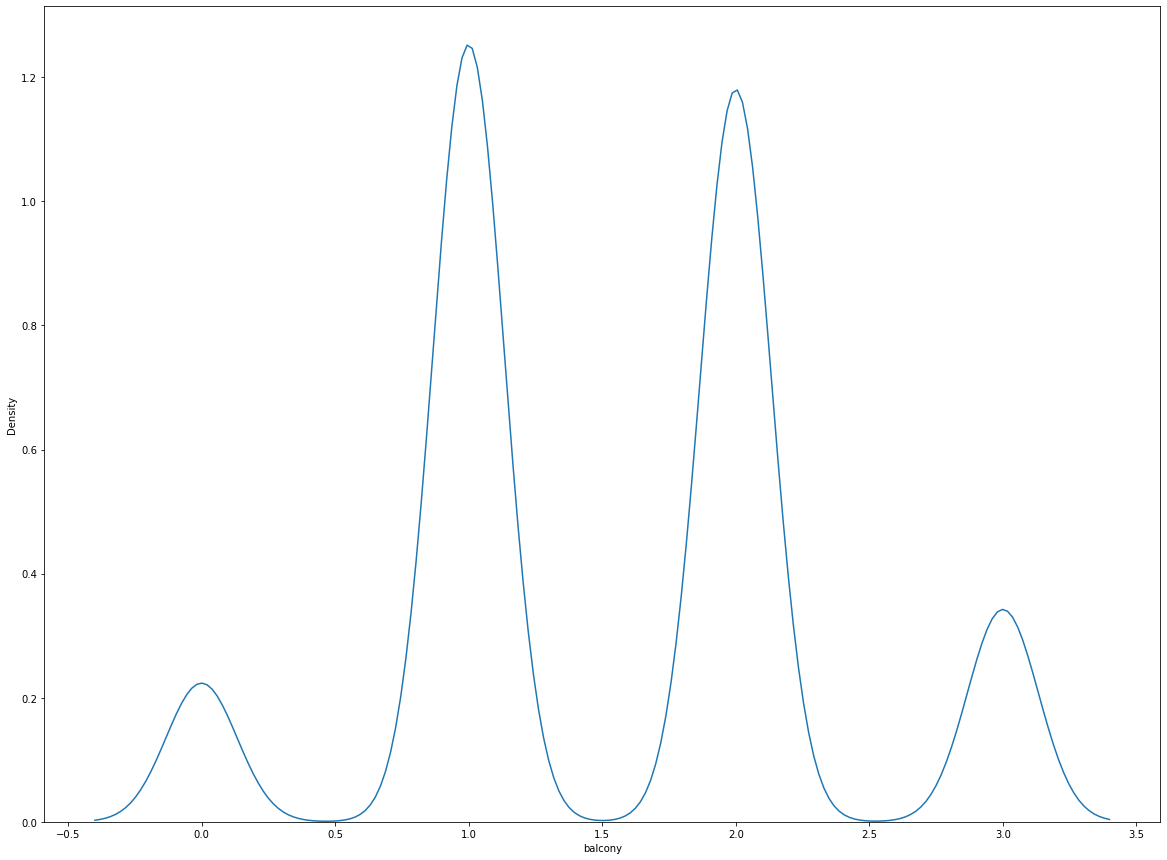

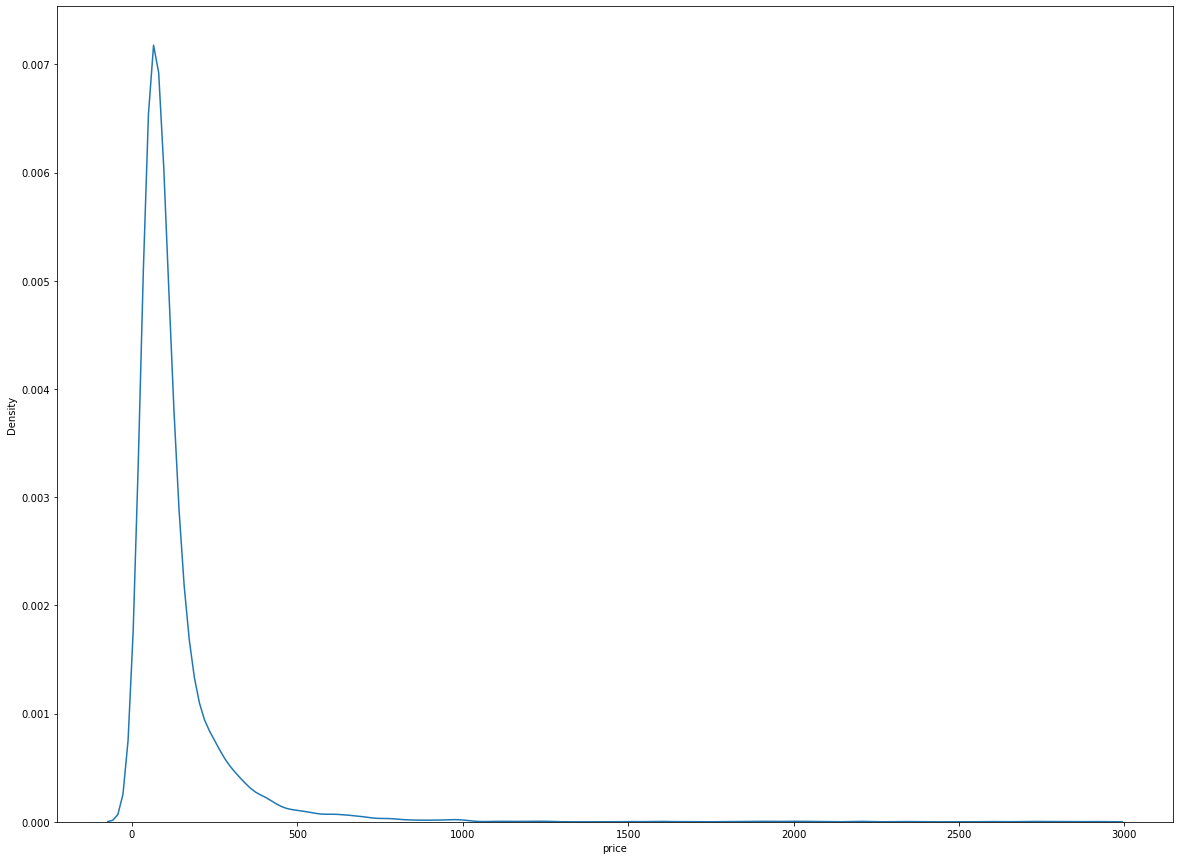

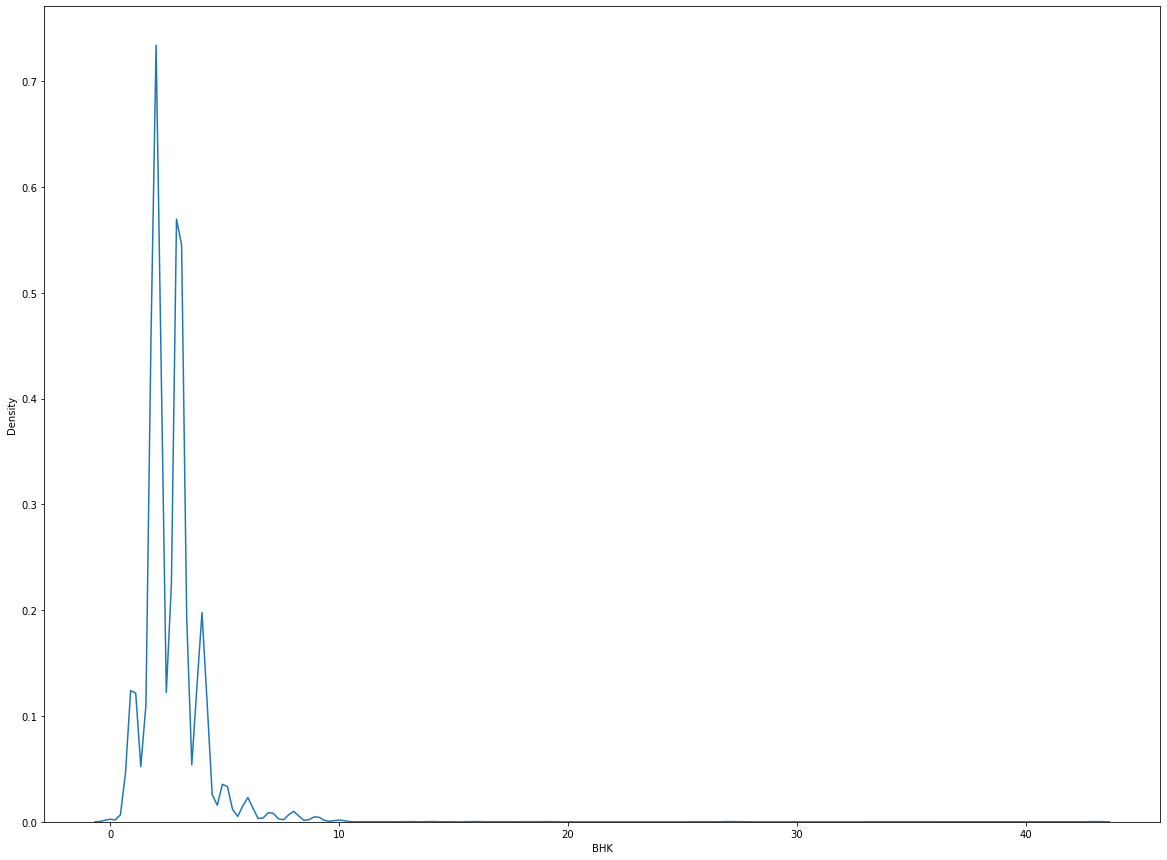

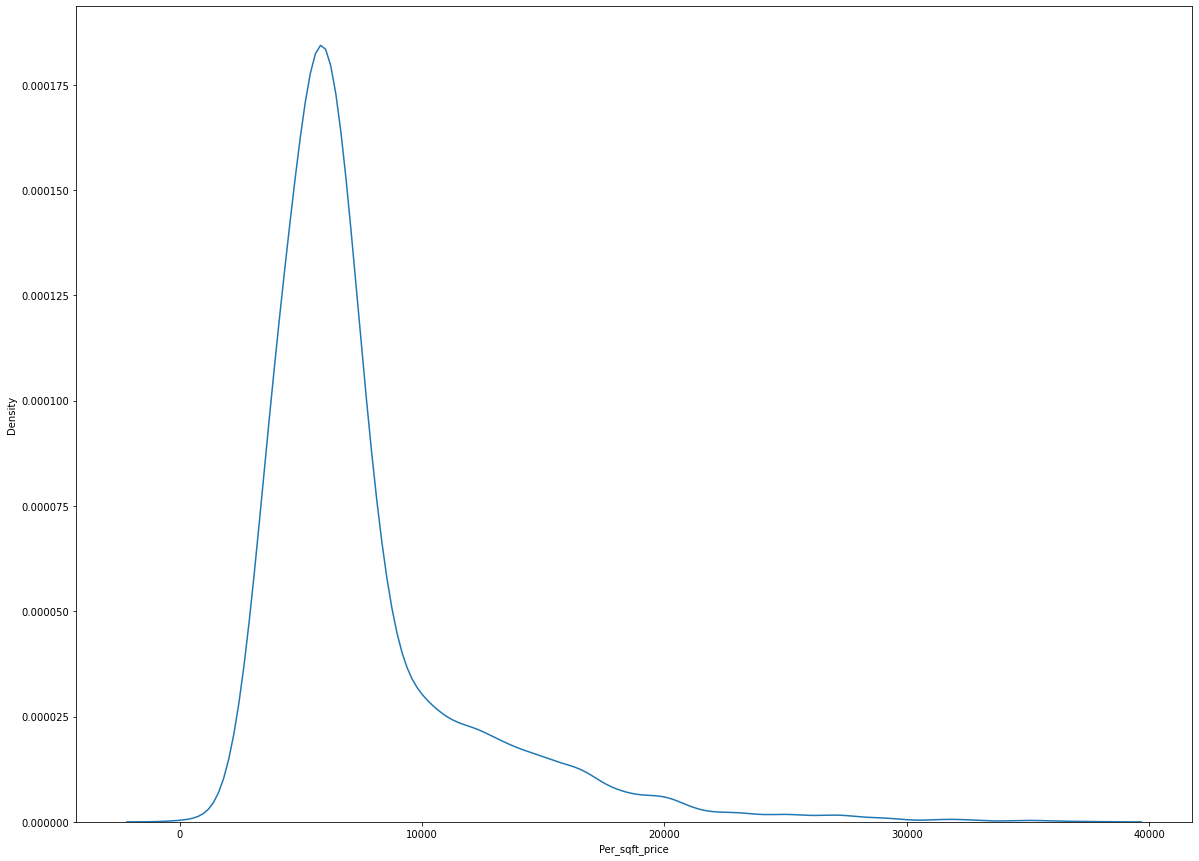

In [76]:
for col in df_numeric_features:
    sns.kdeplot(x=col, data=df_numeric_features)
    plt.show()

## Visualize the target variable

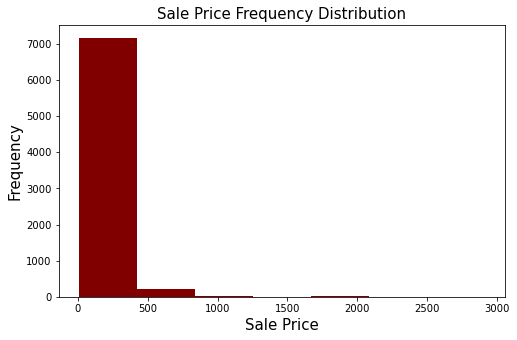

In [77]:
# Sale Price Frequency Distribution
# set the xlabel and the fontsize
plt.figure(figsize=(8,5))
plt.xlabel("Sale Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Sale Price Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df2["price"], color = 'maroon',bins=7)
plt.show()

### Here we can  see that the price is right skewed .
### so we take log transform to normally distribute the data.

In [78]:
df2['log_price'] = np.log(df2['price'])

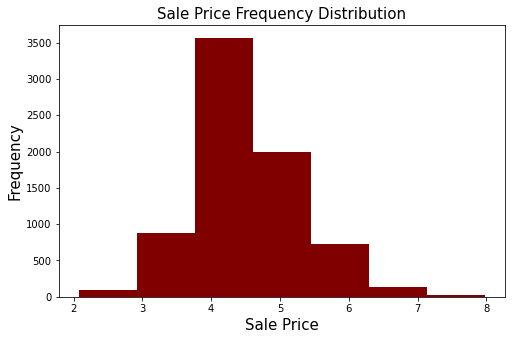

In [79]:
# Sale Price Frequency Distribution
# set the xlabel and the fontsize
plt.figure(figsize=(8,5))
plt.xlabel("Sale Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Sale Price Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df2["log_price"], color = 'maroon',bins=7)
plt.show()

## Count plot of categorical column

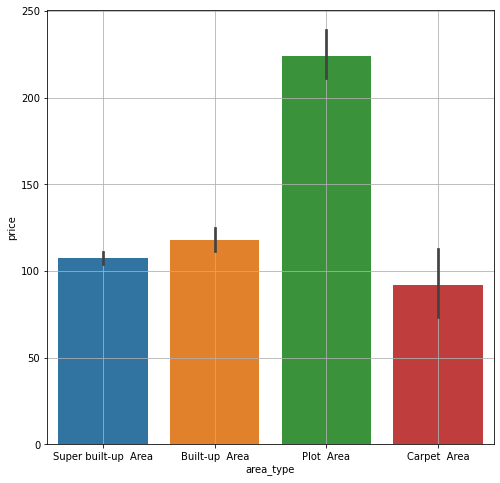

In [80]:
### value count of 'area_type' with respect to price
plt.figure(figsize=(8,8))
sns.barplot(x='area_type',y='price',data=df2)
plt.grid()
plt.show()

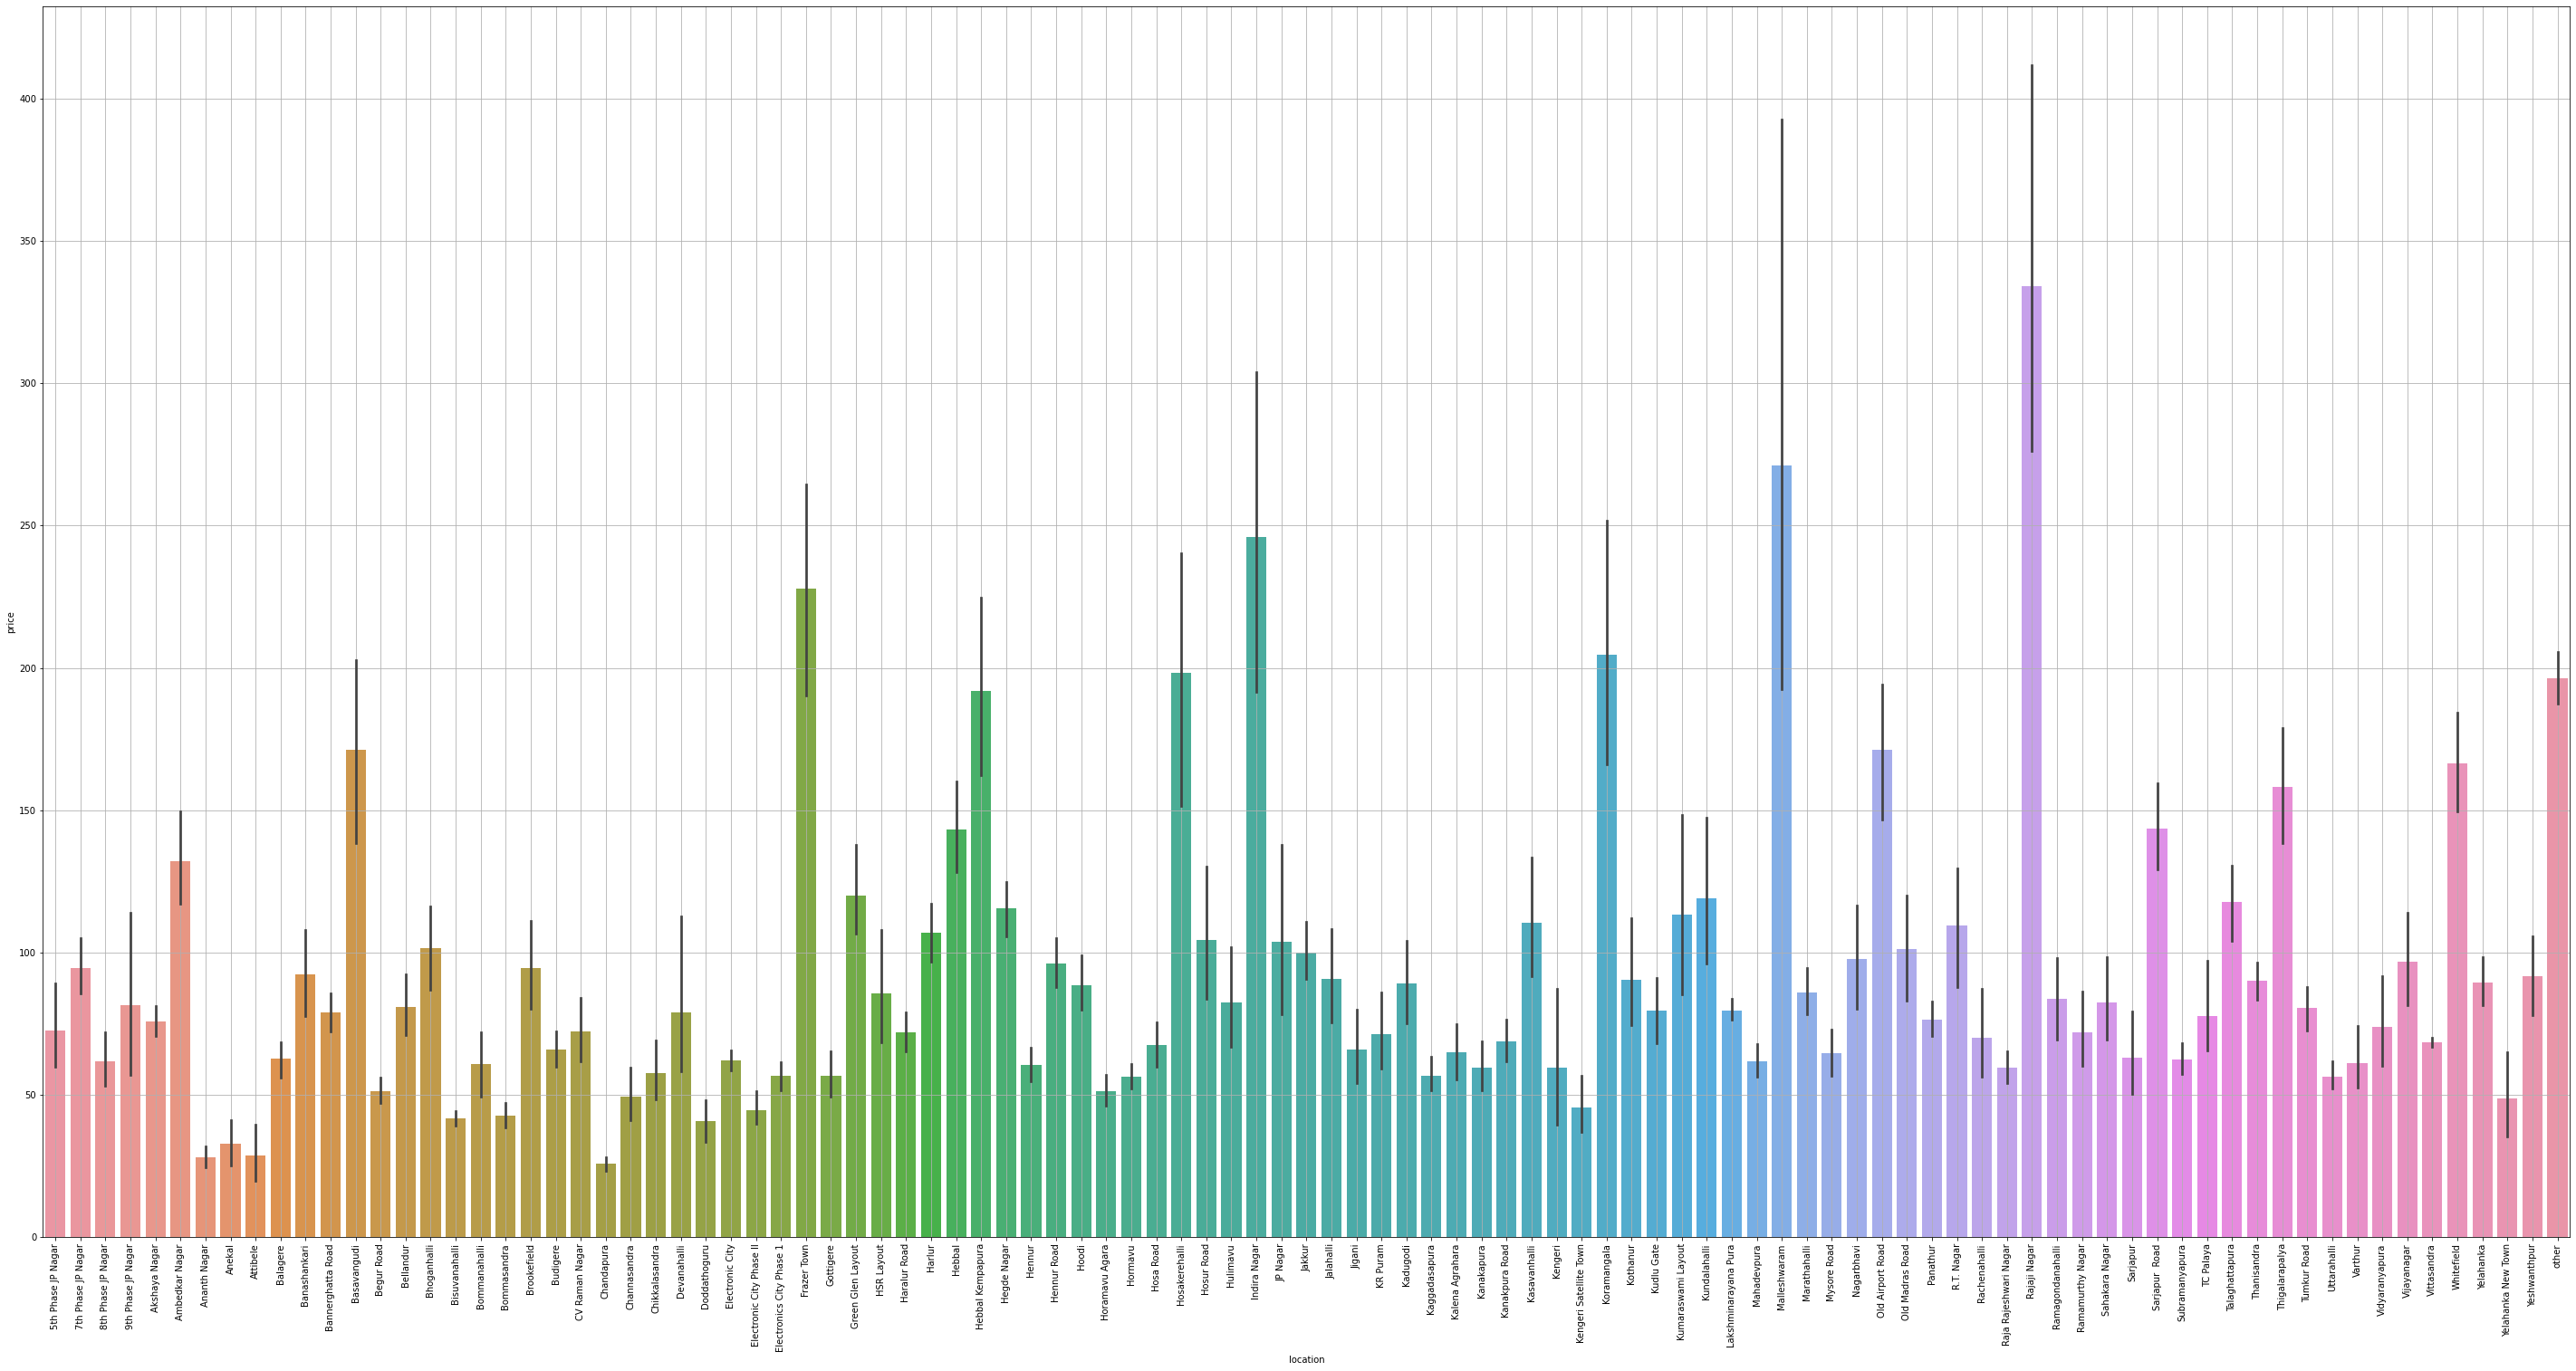

In [81]:
### value count of 'location' with respect to 'price'
plt.figure(figsize=(50,25))
sns.barplot(x='location',y='price',data=df2)
plt.xlabel('location')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### Plot the heatmap for the diagonal correlation matrix
A correlation matrix is a symmetric matrix. Plot only the upper triangular entries using a heatmap.

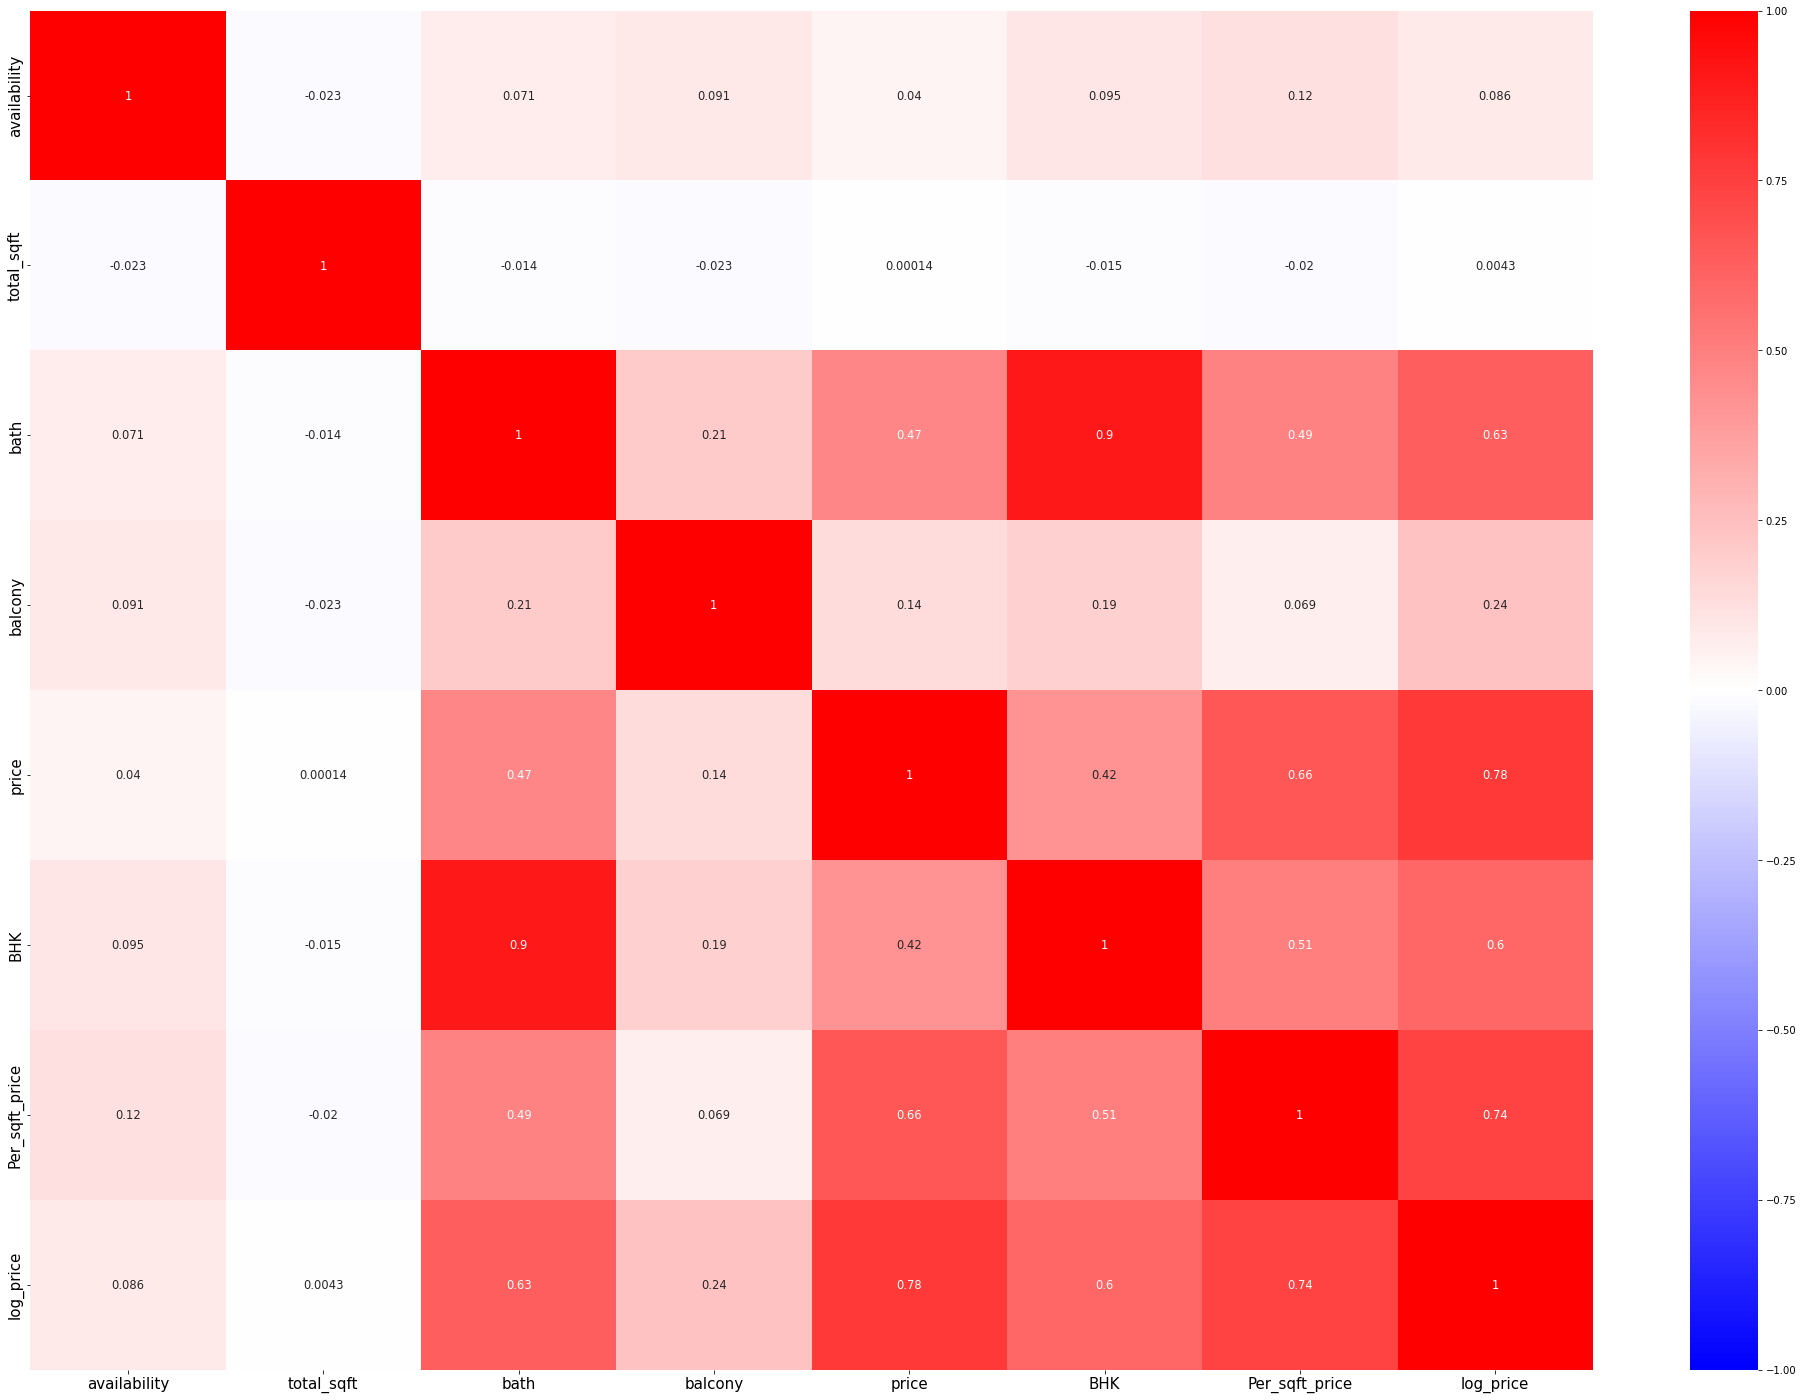

In [82]:
# set the plot size
plt.figure(figsize = (35,25))

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# annot_kws: sets the font size of the annotation
# annot: prints the correlation values in the chart
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
sns.heatmap(df2.corr(), annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})

# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

#### The diagonal represents the correlation of the variable with itself thus all the diagonal entries are '1'. The dark red squares represent the variables with strong positive correlation

## Applying one-hot Encoding

In [83]:
df_dummies=pd.get_dummies(df2)

In [84]:
df_dummies

,availability,total_sqft,bath,balcony,price,BHK,Per_sqft_price,log_price,area_type_Built-up Area,area_type_Carpet Area,...,location_Uttarahalli,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,1,1075.0,2.0,2.0,60.0,2.0,5581.40,4.094345,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1150.0,3.0,3.0,52.5,2.0,4565.22,3.960813,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1070.0,2.0,2.0,39.0,2.0,3644.86,3.663562,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1256.0,2.0,1.0,62.8,2.0,5000.00,4.139955,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1207.0,2.0,2.0,63.0,2.0,5219.55,4.143135,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,1,1200.0,2.0,2.0,140.0,2.0,11666.67,4.941642,0,0,...,0,0,0,0,0,0,0,0,0,1
12077,1,1200.0,5.0,1.0,325.0,4.0,27083.33,5.783825,0,0,...,0,0,0,0,0,0,0,0,0,1
12078,1,1805.0,3.0,3.0,134.0,3.0,7423.82,4.897840,1,0,...,0,0,0,0,0,0,0,0,0,1
12079,1,3600.0,5.0,2.0,400.0,4.0,11111.11,5.991465,0,0,...,0,0,0,0,0,0,0,0,0,1


## Creating a Copy of old variable as Df1_new

In [85]:
df1_new=df_dummies.copy(deep=True)

In [86]:
df1_new

,availability,total_sqft,bath,balcony,price,BHK,Per_sqft_price,log_price,area_type_Built-up Area,area_type_Carpet Area,...,location_Uttarahalli,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,1,1075.0,2.0,2.0,60.0,2.0,5581.40,4.094345,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1150.0,3.0,3.0,52.5,2.0,4565.22,3.960813,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1070.0,2.0,2.0,39.0,2.0,3644.86,3.663562,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1256.0,2.0,1.0,62.8,2.0,5000.00,4.139955,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1207.0,2.0,2.0,63.0,2.0,5219.55,4.143135,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,1,1200.0,2.0,2.0,140.0,2.0,11666.67,4.941642,0,0,...,0,0,0,0,0,0,0,0,0,1
12077,1,1200.0,5.0,1.0,325.0,4.0,27083.33,5.783825,0,0,...,0,0,0,0,0,0,0,0,0,1
12078,1,1805.0,3.0,3.0,134.0,3.0,7423.82,4.897840,1,0,...,0,0,0,0,0,0,0,0,0,1
12079,1,3600.0,5.0,2.0,400.0,4.0,11111.11,5.991465,0,0,...,0,0,0,0,0,0,0,0,0,1


## Model Building

## 1. Building a base model without sacling the data using linear regression model.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [88]:
x=df1_new.drop(['price','log_price'],axis=1)
y=df1_new['price']

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [90]:
lr=LinearRegression()

In [91]:
lr.fit(x_train,y_train)

LinearRegression()

In [92]:
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

In [93]:
print("RMSE for train",np.sqrt(mean_squared_error(y_train,train_pred)))
print("RMSE for test",np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE for train 116.36489529821009
RMSE for test 108.77647764655902


In [94]:
print('r2_score train',r2_score(y_train,train_pred))
print('r2_score test',r2_score(y_test,test_pred))

r2_score train 0.47973740518314456
r2_score test 0.5567479162156902


## Standard Scaling

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

In [95]:
x=df1_new.drop(['price','log_price'],axis=1)
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc=pd.DataFrame(x_sc)
x_sc

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,0.504166,-0.012784,-0.491949,0.572513,-0.540794,-0.451892,-0.447900,-0.072685,-0.448551,0.717495,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,-0.697125
1,0.504166,-0.012643,0.246771,1.837359,-0.540794,-0.687189,2.232639,-0.072685,-0.448551,-1.393738,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,-0.697125
2,-1.983476,-0.012793,-0.491949,0.572513,-0.540794,-0.900299,-0.447900,-0.072685,-0.448551,0.717495,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,-0.697125
3,0.504166,-0.012445,-0.491949,-0.692333,-0.540794,-0.586515,2.232639,-0.072685,-0.448551,-1.393738,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,-0.697125
4,0.504166,-0.012537,-0.491949,0.572513,-0.540794,-0.535678,-0.447900,-0.072685,-0.448551,0.717495,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,-0.697125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,0.504166,-0.012550,-0.491949,0.572513,-0.540794,0.957156,-0.447900,-0.072685,-0.448551,0.717495,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,1.434463
7417,0.504166,-0.012550,1.724210,-0.692333,0.974491,4.526894,-0.447900,-0.072685,2.229402,-1.393738,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,1.434463
7418,0.504166,-0.011417,0.246771,1.837359,0.216848,-0.025278,2.232639,-0.072685,-0.448551,-1.393738,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,1.434463
7419,0.504166,-0.008056,1.724210,0.572513,0.974491,0.828516,-0.447900,-0.072685,-0.448551,0.717495,...,-0.131953,-0.078977,-0.056961,-0.065809,-0.067843,-0.210544,-0.113875,-0.062635,-0.078977,1.434463


## 2. Building a linear regression model with sacled  data and log transform of target variable 

In [96]:
X=df1_new.drop(['price','log_price'],axis=1)
Y=df1_new['log_price']

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(x_sc,Y,test_size=0.25,random_state=1)

In [98]:
X_train.shape

(5565, 111)

In [99]:
lr.fit(X_train,Y_train)

LinearRegression()

In [100]:
train_pred2=lr.predict(X_train)
test_pred2=lr.predict(X_test)

In [101]:
print("RMSE for train",np.sqrt(mean_squared_error(Y_train,train_pred2)))
print("RMSE for test",np.sqrt(mean_squared_error(Y_test,test_pred2)))
print('r2_score train',r2_score(Y_train,train_pred2))
print('r2_score test',r2_score(Y_test,test_pred2))


RMSE for train 0.4031248035578529
RMSE for test 0.38908544509929494
r2_score train 0.7127021441109184
r2_score test 0.736743322107275


### Measuring acurracy and RMSE with actual values

In [102]:
# take the exponential of predictions using np.exp()
predicted = np.exp(test_pred2).round(0)
actual = np.exp(Y_test)
print("RMSE for test",np.sqrt(mean_squared_error(actual,predicted)))
print('r2_score test',r2_score(actual,predicted))

RMSE for test 145.29215329562953
r2_score test 0.20920279927126062


#### Model is not performing well with log transformed data with linear Regression model.

## 3. Random Forest.

In [103]:
from sklearn.ensemble import RandomForestRegressor

x=x_sc
y=df1_new['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

RFC=RandomForestRegressor(n_estimators=50,n_jobs=-1,oob_score=True,random_state=1)

RFC.fit(x_train,y_train)

train_pred3=RFC.predict(x_train)

test_pred3=RFC.predict(x_test)

print('RMSE for train:',np.sqrt(mean_squared_error(y_train,train_pred3)))
print('RMSE for test:',np.sqrt(mean_squared_error(y_test,test_pred3)))
print('r2_score for train:',r2_score(y_train,train_pred3))
print('r2_score for test:',r2_score(y_test,test_pred3))

RMSE for train: 7.833512028763565
RMSE for test: 21.75749325658024
r2_score for train: 0.9976422830496263
r2_score for test: 0.9822663342697283


## GridSearchCV

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
x = x_sc
y=df1_new['price']

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse'],
                'splitter': ['best','random']
            }
        },
        'random forest':{
               'model':  RandomForestRegressor(),
               'params':{
               'n_estimators': [50, 100, 150,200]
                     
               }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.507928,{'normalize': False}
1,lasso,0.503670,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.972349,"{'criterion': 'mse', 'splitter': 'best'}"
3,random forest,0.982441,{'n_estimators': 50}


## Result 

### From all the models that we have performed we can conclude that "Random Forest" is the best model for Bangalore_House_Pricing prediction compared to others and having RMSE=7.83 and Accuracy of training data=99%.